# Testing walk forward validation methods

In [1]:
from one_dimensional_time_series_forecasting import time_series_prediction, hit_rate
import pandas as pd

# model evalution metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# data preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

# interactive figures
%matplotlib widget 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

2022-05-07 13:00:54.637581: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-07 13:00:54.637600: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## load some data

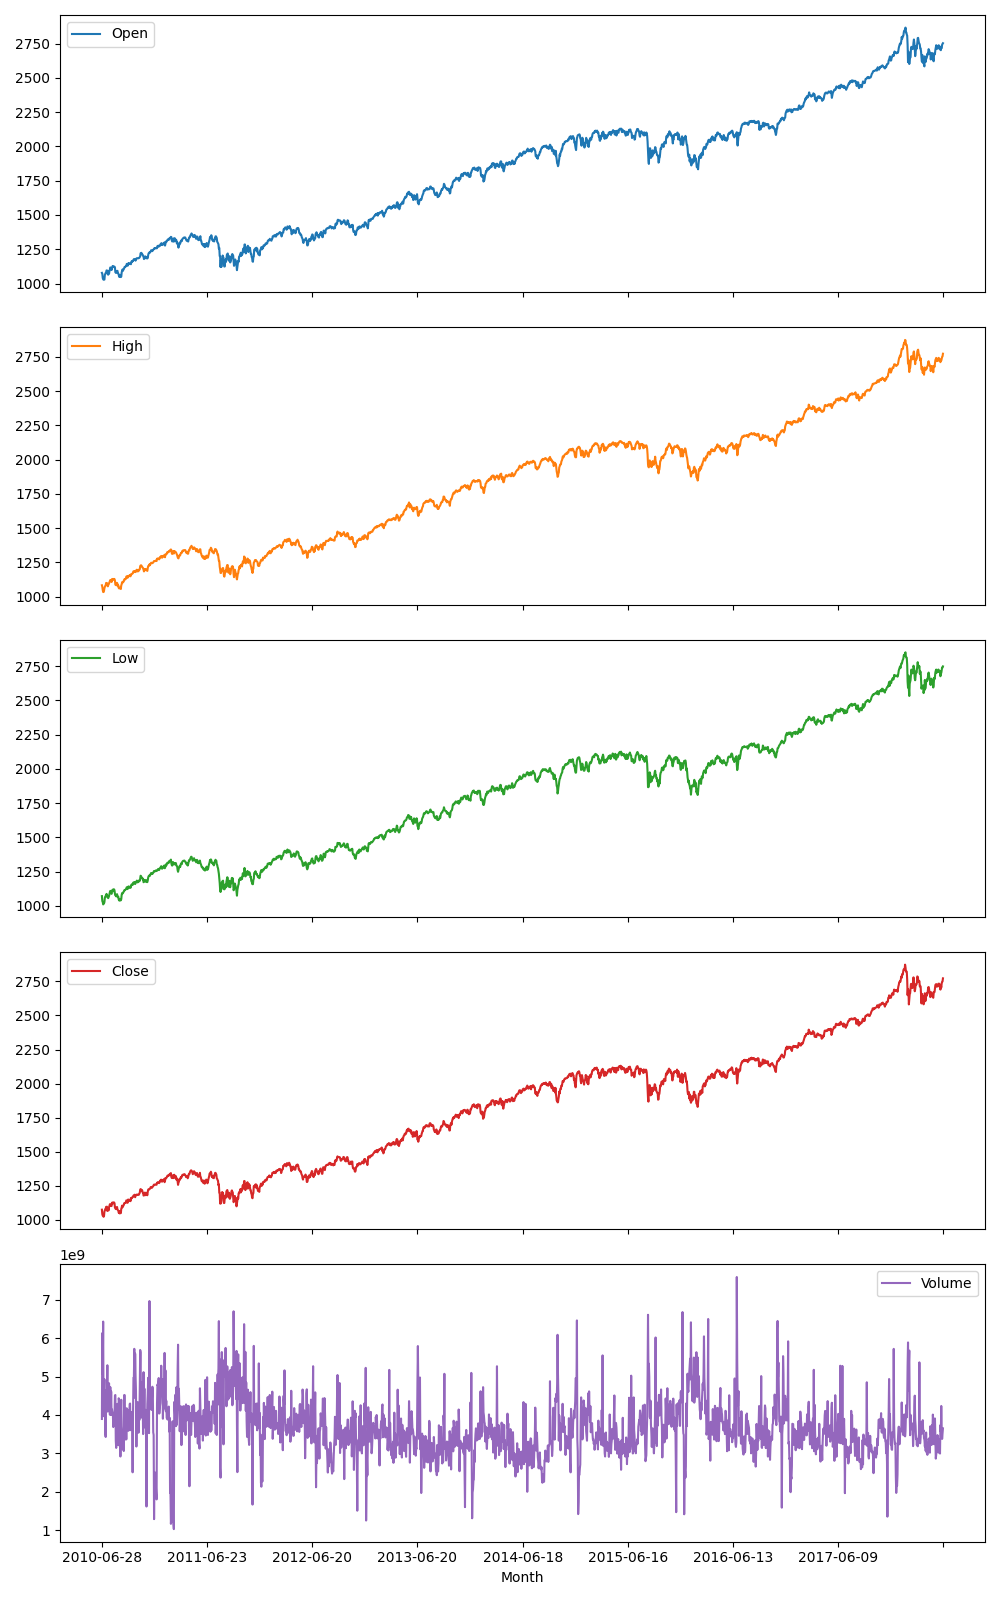

In [2]:
# import some data
df = pd.read_csv('./test_data/GSPC.csv') # sp_500 = GSPC.csv, # airplaine = AirPassengers.csv
df = df.iloc[-2000:,:].reset_index(drop=True) # only look at last 2000 days
df.drop(labels='Adj Close',axis=1,inplace=True)
df.plot(figsize=(10,16),legend=True,xlabel='Month',subplots=True,x='Date')
plt.tight_layout()
# display(df)

## run single of sample forecasting

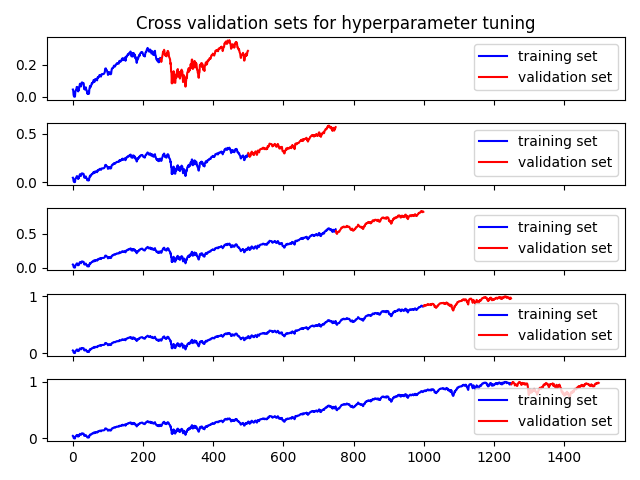

Training multivariate linear regression:

Linear regression coefficients: 
 [ 5.26357975e-02 -5.85276708e-02  8.80795380e-03 -3.29223806e-04
  7.62085013e-02 -4.95962541e-02  1.54658790e-02 -5.65851318e-02
 -1.62826870e-03  1.01241931e+00]
MAPE: 0.00768509287901183
RMSE:  0.015301820141048628
MAE:  0.009819259031783231

Naive model results:
MAPE: 0.007570175049125593
RMSE:  0.015148448922620246
MAE:  0.009669122860464499


,date,Value,Linear,SVM,NN,LSTM,Naive
0,2010-06-28,0.045207,None,NaN,NaN,NaN,None
1,2010-06-29,0.039403,None,NaN,NaN,NaN,None
2,2010-06-30,0.011708,None,NaN,NaN,NaN,None
3,2010-07-01,0.003129,None,NaN,NaN,NaN,None
4,2010-07-02,0.000000,None,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...
1995,2018-05-31,1.535608,1.519394,NaN,NaN,NaN,1.518785
1996,2018-06-01,1.533540,1.535435,NaN,NaN,NaN,1.535608
1997,2018-06-04,1.554370,1.533656,NaN,NaN,NaN,1.53354
1998,2018-06-05,1.560528,1.554588,NaN,NaN,NaN,1.55437


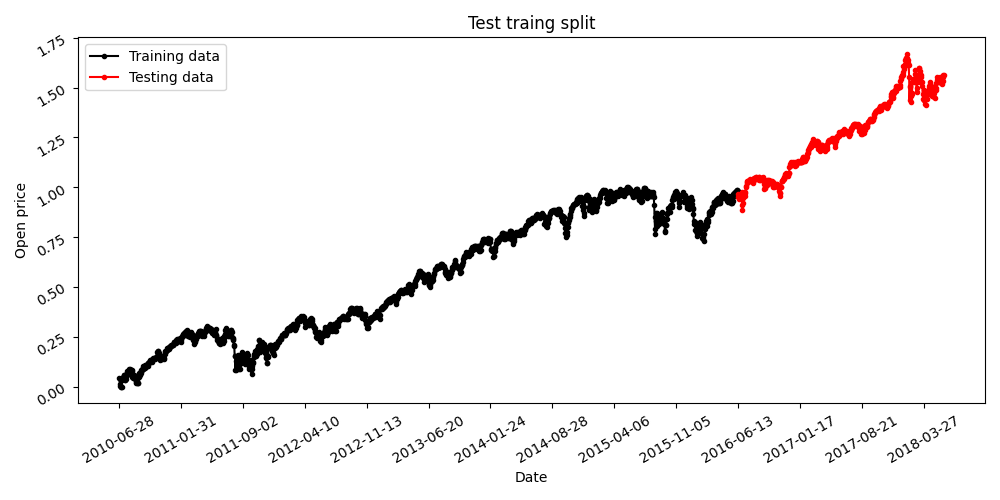

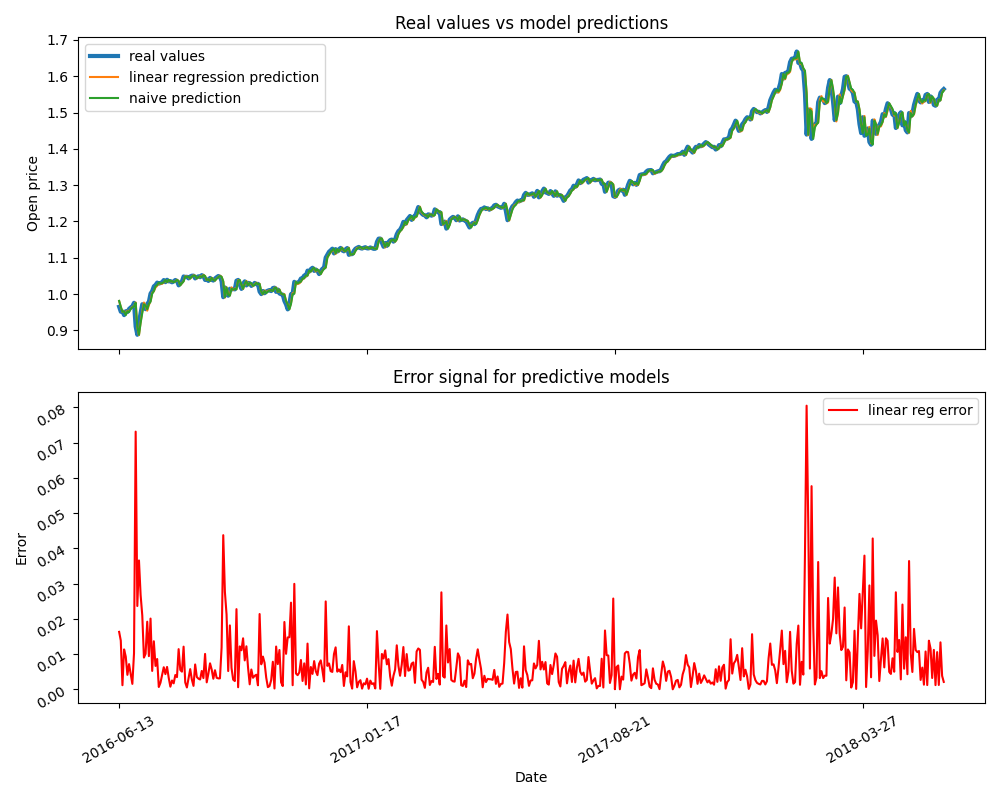

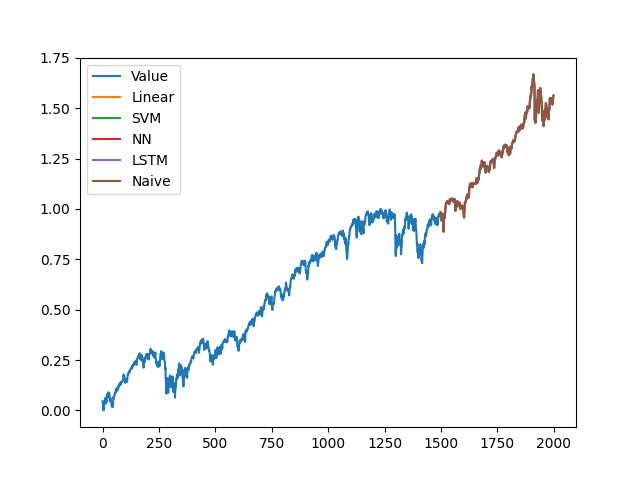

In [3]:
# some forecasting parameters
window_length = 10
split = 500

# scale input data
scaler = MinMaxScaler()
test_data_scaler = scaler.fit(df['Open'].iloc[0:-split].to_numpy().reshape(-1,1))#.flatten()
scaled_training_data = scaler.fit_transform(df['Open'][0:-split].to_numpy().reshape(-1,1))#.flatten()
scaled_test_data = scaler.transform(df['Open'][-split:].to_numpy().reshape(-1,1))#.flatten()
scaled_data = np.append(scaled_training_data,scaled_test_data)

# initialize class object
blah = time_series_prediction(df['Date'],scaled_data,window_length,1)#time_series_prediction(sp_500['Date'][-4000:],sp_500['Volume'][-4000:]/1e9,5,1) # pass: ime series dates, univariate time series, lag window length, a number of steps ahead to predict
blah.sliding_window_1(verbose=0) # time series to supervised ML problem
blah.train_test_split(split=split) # testing and training dataset split
blah.test_train_plot(ylabel='Open price')    # visualize training split

# perform some prediction tasks
blah.linear_regression()
# blah.support_vector_machine(model_tunning=True)
# blah.neural_net_mlp(model_tunning=True)
# blah.lstm(model_tunning=False)
blah.naive_model()

# visualize results
blah.vis_results_time_series(ylabel='Open price',second_plot='error')

# tabulate results
tabulated_results_0 = blah.results()
tabulated_results_0.plot()
display(tabulated_results_0)

## run walk forward validation

In [4]:
import importlib
import one_dimensional_time_series_forecasting
importlib.reload(one_dimensional_time_series_forecasting)
from one_dimensional_time_series_forecasting import time_series_prediction, hit_rate


In [6]:
blah.walk_forward_val(blah.linear_regression_model,train_len=225,test_len=25,train_frequency=20)

Taking 80 walks during walk forward validation
